In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')

In [2]:
PATH = 'exps/exp_5/log_r1'

In [3]:
logs = np.loadtxt(PATH, dtype='str', delimiter='\n')
# from start training only
for i, log in enumerate(logs):
    if 'Start training...' in log:
        idx_strt = i
        break
logs = logs[idx_strt:]
# clean time stamps
for i, log in enumerate(logs):
    logs[i] = log[31:]

In [4]:
trn_steps = []
trn_accs = []
trn_ppls = []
lrs = []
val_accs = []
val_ppls = []
val_steps = []

In [5]:
for log in logs:
    if log[:4] == 'Step':
        
        trn_steps.append(int(log[5:log.find('/')]))
        
        idx_trn_acc_strt = log.find('acc:') + 6
        idx_trn_acc_end = idx_trn_acc_strt + log[idx_trn_acc_strt:].find(';')
        trn_accs.append(float(log[idx_trn_acc_strt:idx_trn_acc_end]))
        
        idx_trn_ppl_strt = log.find('ppl:') + 5
        idx_trn_ppl_end = idx_trn_ppl_strt + log[idx_trn_ppl_strt:].find(';')
        trn_ppls.append(float(log[idx_trn_ppl_strt:idx_trn_ppl_end]))
        
        idx_lr_strt = log.find('lr:') + 4
        idx_lr_end = idx_lr_strt + log[idx_lr_strt:].find(';')
        lrs.append(float(log[idx_lr_strt:idx_lr_end]))
        
    if log[:22] == 'Validation perplexity:':
        val_ppls.append(float(log[23:]))
        val_steps.append(trn_steps[-1])
        
    if log[:20] == 'Validation accuracy:':
        val_accs.append(float(log[21:]))

In [6]:
trn_steps = np.array(trn_steps)
trn_accs, trn_ppls = np.array(trn_accs), np.array(trn_ppls)
lrs = np.array(lrs)
val_accs, val_ppls = np.array(val_accs), np.array(val_ppls)
val_steps = np.array(val_steps)

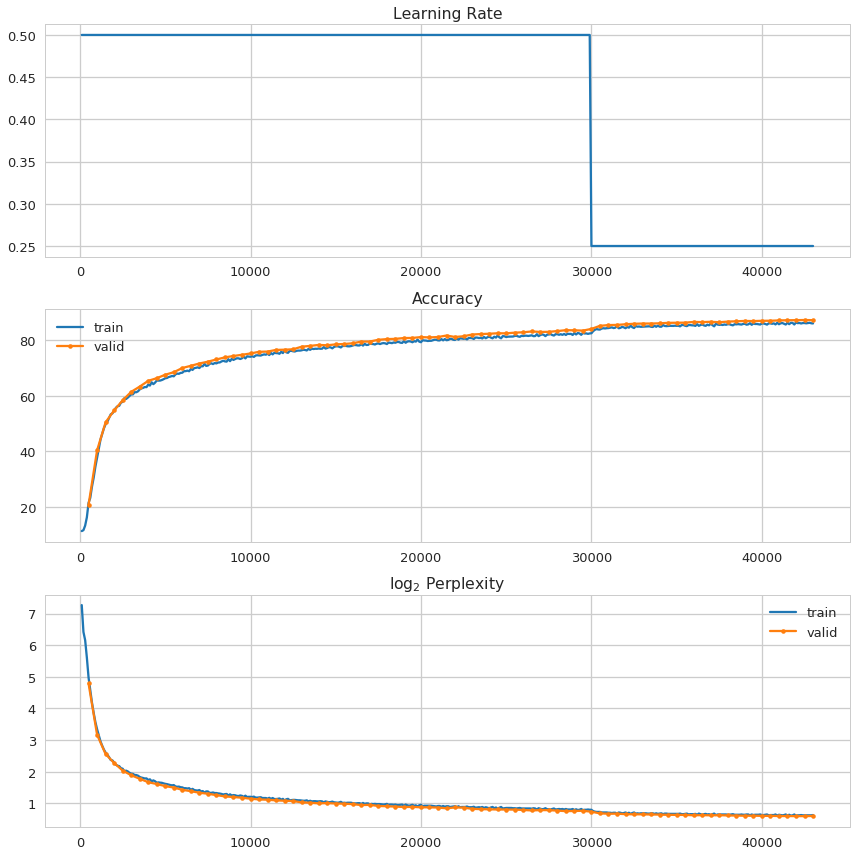

In [7]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(trn_steps, lrs)
plt.title('Learning Rate')
plt.subplot(3, 1, 2)
plt.plot(trn_steps, trn_accs, label='train')
plt.plot(val_steps, val_accs, '.-', label='valid')
plt.legend()
plt.title('Accuracy')
plt.subplot(3, 1, 3)
plt.plot(trn_steps, np.log2(trn_ppls), label='train')
plt.plot(val_steps, np.log2(val_ppls), '.-', label='valid')
plt.legend()
plt.title('$\log_2$ Perplexity')
plt.tight_layout()
plt.show()

---

In [8]:
last_step = 42000
idx_last_step_trn = np.where(trn_steps == last_step)[0][0]
idx_last_step_val = np.where(val_steps == last_step)[0][0]

In [9]:
trn_steps_ = trn_steps[:idx_last_step_trn]
trn_accs_ = trn_accs[:idx_last_step_trn]
trn_ppls_ = trn_ppls[:idx_last_step_trn]
lrs_ = lrs[:idx_last_step_trn]
val_steps_ = val_steps[:idx_last_step_val]
val_accs_ = val_accs[:idx_last_step_val]
val_ppls_ = val_ppls[:idx_last_step_val]

In [10]:
PATH = 'exps/exp_5/log_r2'

In [11]:
logs = np.loadtxt(PATH, dtype='str', delimiter='\n')
# from start training only
for i, log in enumerate(logs):
    if 'Start training...' in log:
        idx_strt = i
        break
logs = logs[idx_strt:]
# clean time stamps
for i, log in enumerate(logs):
    logs[i] = log[31:]

In [12]:
trn_steps = []
trn_accs = []
trn_ppls = []
lrs = []
val_accs = []
val_ppls = []
val_steps = []

In [13]:
for log in logs:
    if log[:4] == 'Step':
        
        trn_steps.append(int(log[5:log.find('/')]))
        
        idx_trn_acc_strt = log.find('acc:') + 6
        idx_trn_acc_end = idx_trn_acc_strt + log[idx_trn_acc_strt:].find(';')
        trn_accs.append(float(log[idx_trn_acc_strt:idx_trn_acc_end]))
        
        idx_trn_ppl_strt = log.find('ppl:') + 5
        idx_trn_ppl_end = idx_trn_ppl_strt + log[idx_trn_ppl_strt:].find(';')
        trn_ppls.append(float(log[idx_trn_ppl_strt:idx_trn_ppl_end]))
        
        idx_lr_strt = log.find('lr:') + 4
        idx_lr_end = idx_lr_strt + log[idx_lr_strt:].find(';')
        lrs.append(float(log[idx_lr_strt:idx_lr_end]))
        
    if log[:22] == 'Validation perplexity:':
        val_ppls.append(float(log[23:]))
        val_steps.append(trn_steps[-1])
        
    if log[:20] == 'Validation accuracy:':
        val_accs.append(float(log[21:]))

In [14]:
trn_steps = np.array(trn_steps)
trn_accs, trn_ppls = np.array(trn_accs), np.array(trn_ppls)
lrs = np.array(lrs)
val_accs, val_ppls = np.array(val_accs), np.array(val_ppls)
val_steps = np.array(val_steps)

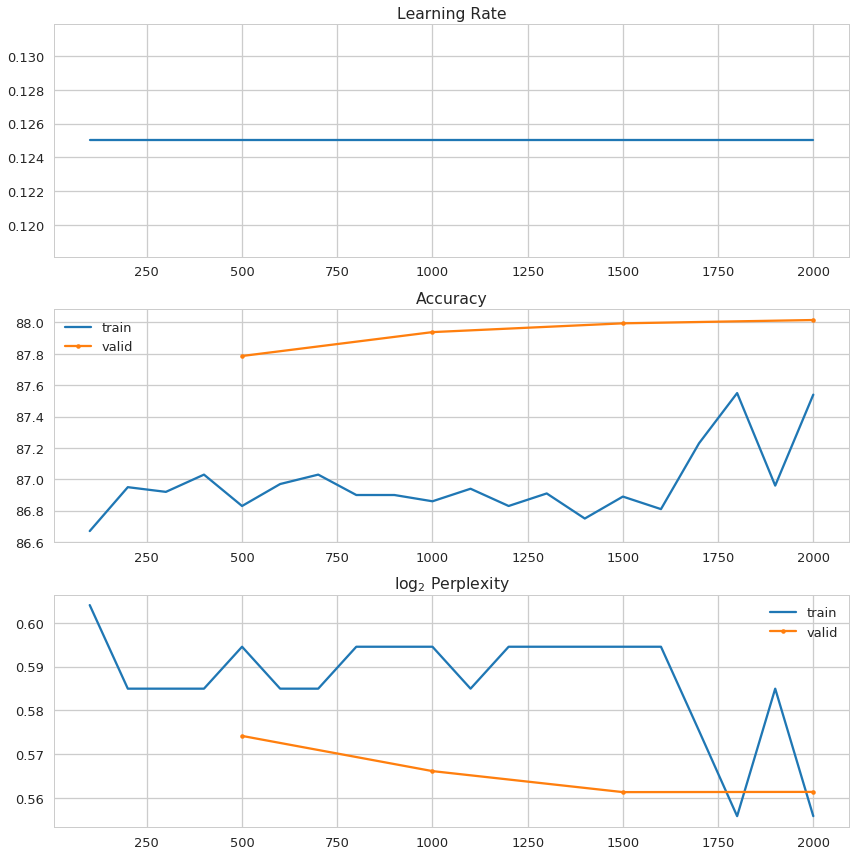

In [15]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(trn_steps, lrs)
plt.title('Learning Rate')
plt.subplot(3, 1, 2)
plt.plot(trn_steps, trn_accs, label='train')
plt.plot(val_steps, val_accs, '.-', label='valid')
plt.legend()
plt.title('Accuracy')
plt.subplot(3, 1, 3)
plt.plot(trn_steps, np.log2(trn_ppls), label='train')
plt.plot(val_steps, np.log2(val_ppls), '.-', label='valid')
plt.legend()
plt.title('$\log_2$ Perplexity')
plt.tight_layout()
plt.show()

In [16]:
trn_steps = trn_steps + last_step
val_steps = val_steps + last_step
trn_steps = np.concatenate((trn_steps_, trn_steps))
trn_accs = np.concatenate((trn_accs_, trn_accs))
trn_ppls = np.concatenate((trn_ppls_, trn_ppls))
lrs = np.concatenate((lrs_, lrs))
val_steps = np.concatenate((val_steps_, val_steps))
val_accs = np.concatenate((val_accs_, val_accs))
val_ppls = np.concatenate((val_ppls_, val_ppls))

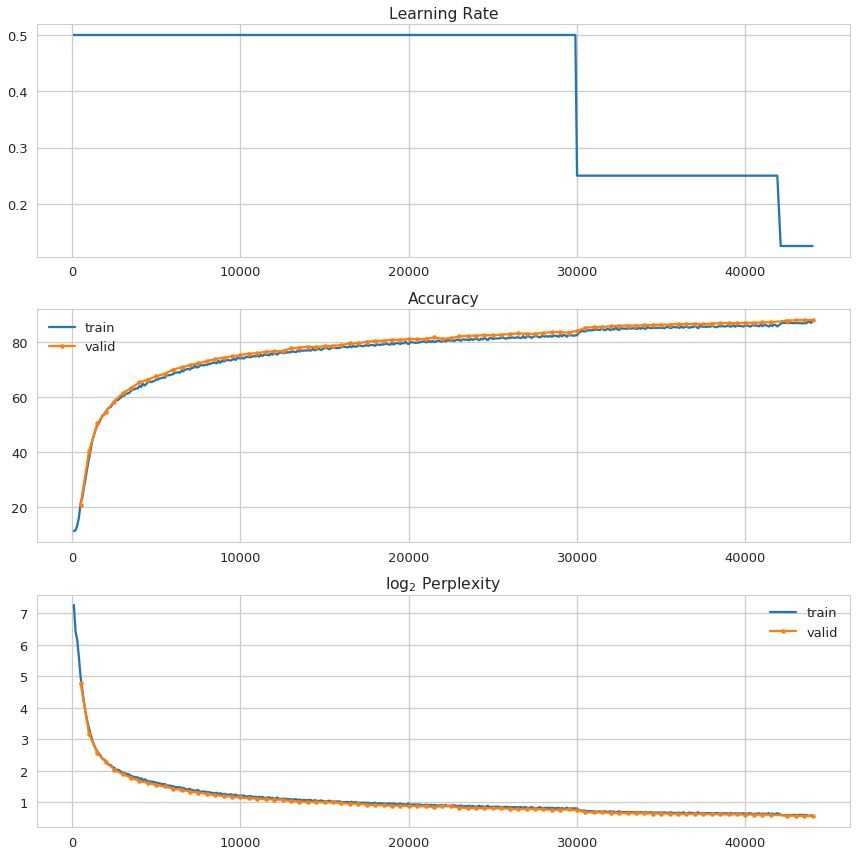

In [17]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(trn_steps, lrs)
plt.title('Learning Rate')
plt.subplot(3, 1, 2)
plt.plot(trn_steps, trn_accs, label='train')
plt.plot(val_steps, val_accs, '.-', label='valid')
plt.legend()
plt.title('Accuracy')
plt.subplot(3, 1, 3)
plt.plot(trn_steps, np.log2(trn_ppls), label='train')
plt.plot(val_steps, np.log2(val_ppls), '.-', label='valid')
plt.legend()
plt.title('$\log_2$ Perplexity')
plt.tight_layout()
plt.show()